<a href="https://colab.research.google.com/github/Dhruvb0802/Deep_learning_Tasks/blob/main/cameratake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv 
import numpy as np
!git clone https://github.com/Asadullah-Dal17/Yolov4-Detector-and-Distance-Estimator


# Distance constants 
KNOWN_DISTANCE = 45 #INCHES
PERSON_WIDTH = 16 #INCHES
MOBILE_WIDTH = 3.0 #INCHES

# Object detector constant 
CONFIDENCE_THRESHOLD = 0.4
NMS_THRESHOLD = 0.3

# colors for object detected
COLORS = [(255,0,0),(255,0,255),(0, 255, 255), (255, 255, 0), (0, 255, 0), (255, 0, 0)]
GREEN =(0,255,0)
BLACK =(0,0,0)
# defining fonts 
FONTS = cv.FONT_HERSHEY_COMPLEX

fatal: destination path 'Yolov4-Detector-and-Distance-Estimator' already exists and is not an empty directory.


In [ ]:
class_names = []
with open("/content/Yolov4-Detector-and-Distance-Estimator/classes.txt", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]
#  setttng up opencv net
yoloNet = cv.dnn.readNet('/content/Yolov4-Detector-and-Distance-Estimator/yolov4-tiny.weights', '/content/Yolov4-Detector-and-Distance-Estimator/yolov4-tiny.cfg')
yoloNet.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
yoloNet.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA_FP16)

model = cv.dnn_DetectionModel(yoloNet)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)


In [ ]:
def object_detector(image):
    classes, scores, boxes = model.detect(image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    # creating empty list to add objects data
    data_list =[]
    bruh=[]
    
    for (classid, score, box) in zip(classes, scores, boxes):
        # define color of each, object based on its class id 
        color= COLORS[int(classid) % len(COLORS)]
    
        label = "%s : %f" % (class_names[classid], score)

        # draw rectangle on and label on object
        cv.rectangle(image, box, color, 2)
        cv.putText(image, label, (box[0], box[1]-14), FONTS, 0.5, color, 2)
        #cv.putText()
    
        # getting the data 
        # 1: class name  2: object width in pixels, 3: position where have to draw text(distance)
        if classid ==0: # person class id 
            data_list.append([class_names[classid], [box[2],box[3]], (box[0], box[1]-2)])
        elif classid ==67:
            data_list.append([class_names[classid], [box[2],box[3]], (box[0], box[1]-2)])
            bruh.append(box[3])
        # if you want inclulde more classes then you have to simply add more [elif] statements here
        # returning list containing the object data. 
        bruh.append(box)
    return data_list
    
    print(boxes)

def focal_length_finder (measured_distance, real_width, width_in_rf):
    focal_length = (width_in_rf * measured_distance) / real_width

    return focal_length

# distance finder function 
def distance_finder(focal_length, real_object_width, width_in_frmae):
    distance = (real_object_width * focal_length) / width_in_frmae
    return distance

In [ ]:

# reading the reference image from dir 
ref_person = cv.imread('/content/Yolov4-Detector-and-Distance-Estimator/ReferenceImages/image14.png')
ref_mobile = cv.imread('/content/Yolov4-Detector-and-Distance-Estimator/ReferenceImages/image4.png')

ref_mobile

mobile_data = object_detector(ref_mobile)
mobile_data
mobile_width_in_rf = mobile_data[1][1][0]

person_data = object_detector(ref_person)
person_width_in_rf = person_data[0][1][0]

print(f"Person width in pixels : {person_width_in_rf} mobile width in pixel: {mobile_width_in_rf}")

# finding focal length 
focal_person = focal_length_finder(KNOWN_DISTANCE, PERSON_WIDTH, person_width_in_rf)

focal_mobile = focal_length_finder(KNOWN_DISTANCE, MOBILE_WIDTH, mobile_width_in_rf)

Person width in pixels : 367 mobile width in pixel: 72


In [ ]:
'''classes, scores, boxes = model.detect(ref_mobile, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)
    # creating empty list to add objects data
print(classes)
scores
boxes
data_list =[]
print(list(zip(classes,scores, boxes)))
for (classid, score, box) in zip(classes, scores, boxes):
        # define color of each, object based on its class id 
        
      color= COLORS[int(classid) % len(COLORS)]
    
      label = "%s : %f" % (class_names[classid], score)

        # draw rectangle on and label on object
      cv.rectangle(ref_mobile, box, color, 2)
      cv.putText(ref_mobile, label, (box[0], box[1]-14), FONTS, 0.5, color, 2)
    
        # getting the data 
        # 1: class name  2: object width in pixels, 3: position where have to draw text(distance)
      if classid ==0: # person class id 
            data_list.append([class_names[classid], box[2], (box[0], box[1]-2)])
      elif classid ==67:
            data_list.append([class_names[classid], box[2], (box[0], box[1]-2)])
        # if you want inclulde more classes then you have to simply add more [elif] statements here
        # returning list containing the object data. 
print(data_list)'''
    

[ 0 67]
[(0, 0.81155276, array([ 74, 151, 394, 312], dtype=int32)), (67, 0.8967539, array([206, 290,  76, 147], dtype=int32))]
[['person', 394, (74, 149)], ['cell phone', 76, (206, 288)]]


In [ ]:
images=['kFM1C.jpg']
import numpy as np
import cv2 
import glob
from google.colab.patches import cv2_imshow
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
#images = glob.glob('*.jpg')
print(images)
for fname in images:
    img = cv2.imread(fname)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2_imshow(gray)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        #cv2_imshow(img)
        cv2.waitKey(500)
#print(imgpoints)
#print(objpoints)

cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
c_x=mtx[0][2]
c_y=mtx[1][2]


['kFM1C.jpg']


error: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

['photo', 'jpg']
Saved to photo.jpg


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


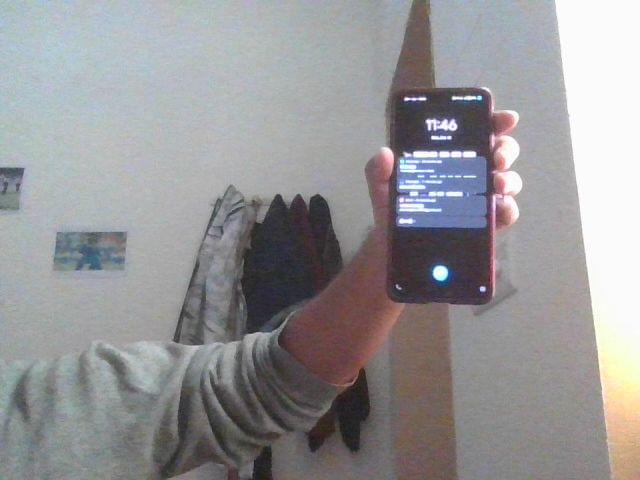

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

10.445393258426966 -4.109662921348314 36.40449438202247


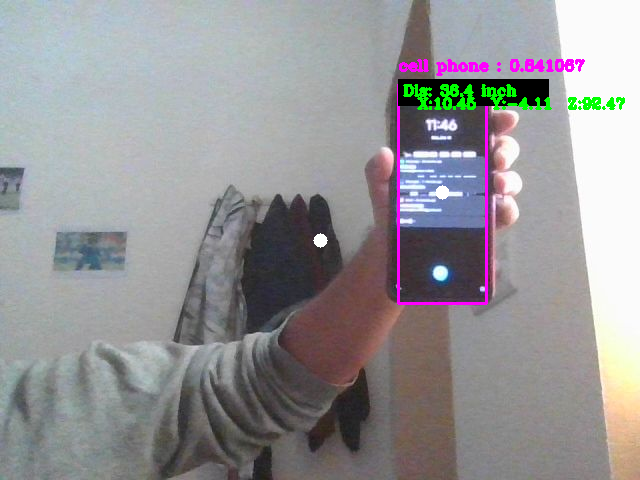

In [ ]:
frame=cv.imread('/content/photo.jpg')
from google.colab.patches import cv2_imshow
data = object_detector(frame) 
mainlp=[]
sublp=[]
mainlm=[]
sublm=[]
#l12=np.array([0,0,320,240])
#l12=np.array(bruh1)
#l12=bruh1
#xll=[bruh1[0],bruh1[1]]
#yll=[bruh1[2],bruh1[3]]

Xf=0
Yf=0
y=0
for d in data:
        if d[0] =='person':
            distance = distance_finder(focal_person, PERSON_WIDTH, d[1][0])
            x,y = d[2]
            #sublp[0],sublp[1]=x+75,y+10
            #mainlp.append(sublp)
        elif d[0] =='cell phone':
            distance = distance_finder (focal_mobile, MOBILE_WIDTH, d[1][0])
            x,y=d[2]
            x1=int((x+(d[1][0])/2)//1)
            y1=int((y+(d[1][1]/2))//1)
            sublm.append(x+75)
            sublm.append(y+10)
            mainlm.append(sublm)
            Yf=distance*((y1-(240))/focal_mobile)
            Xf=distance*((x1-(320))/focal_mobile)

            x, y = d[2]
        cv.rectangle(frame, (x, y-3), (x+150, y+23),BLACK,-1 )
        cv.putText(frame, f'Dis: {round((distance),2)} inch', (x+5,y+13), FONTS, 0.48, GREEN, 2)
        #cv.putText(frame,f'u: {(x+75)*2.54} v:{(y+10)*2.54}',(x+20,y+26), FONTS, 0.48, GREEN , 2)
        cv.putText(frame,f'X:{round(Xf*2.54,2)}  Y:{round(Yf*2.54,2)}  Z:{round((distance*2.54),2)}',(x+20,y+26), FONTS, 0.48, GREEN , 2)
        #cv.rectangle(frame,(x,y),(x1,y1),GREEN,-1)
        cv.circle(frame, (320, 240), 7, (255, 255, 255), -1) 
        cv.circle(frame, (x1,y1), 7, (255, 255, 255), -1) 


        print(Xf*2.54,Yf*2.54,distance)

cv2_imshow(frame)

In [ ]:
img_read= cv.imread(r'image.png')
cv.rectangle(img_read,(xmin,ymin),(xmax,ymax),(0,0,255),3)
center_x = int((xmin+xmax)//2)
center_y = int((ymin+ymax)//2)
print(center_x,center_y)
cv.circle(img_read,(center_x,center_y),50,(0,0,255),3)
print('Pixel intensity at:',img_read[center_x][center_y])
plt.imshow(img_read[:,:,::-1])




NameError: ignored

In [ ]:
# read image through command line
img = cv.imread('/content/photo.jpg')
 
# convert the image to grayscale
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
# convert the grayscale image to binary image
ret,thresh = cv.threshold(gray_image,127,255,0)
 
# find contours in the binary image
im2, contours, hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
for c in contours:
   # calculate moments for each contour
   M = cv.moments(c)
 
   # calculate x,y coordinate of center
   cX = int(M["m10"] / M["m00"])
   cY = int(M["m01"] / M["m00"])
   cv.circle(img, (cX, cY), 5, (255, 255, 255), -1)
   cv.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
   # display the image
   cv2_imshow("Image", img)
   cv.waitKey(0)

ValueError: ignored

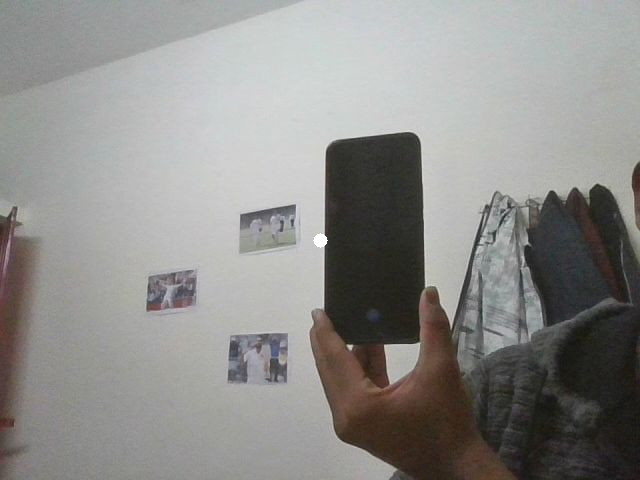

In [ ]:
image = cv.imread('/content/photo.jpg')
(h, w) = image.shape[:2] #w:image-width and h:image-height
cv.circle(image, (w//2, h//2), 7, (255, 255, 255), -1) 
cv2_imshow(image)